In [76]:
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from matplotlib import cm

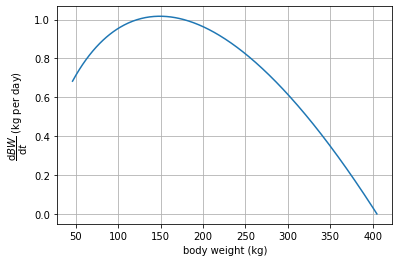

In [117]:
mu_0 = 0.015
BW_max = 450
BW_f = 0.9 * 450
BW_0 = 45

BW = np.arange(BW_0+1, BW_f+1, 1)

dBW_dt = mu_0 * BW * (np.log(BW_f / BW) / np.log(BW_f / BW_0))

plt.plot(BW, dBW_dt)
plt.ylabel(r"$\dfrac{\mathrm{d}BW}{\mathrm{d}t}$ (kg per day)")
plt.xlabel("body weight (kg)")
plt.grid()
plt.show()

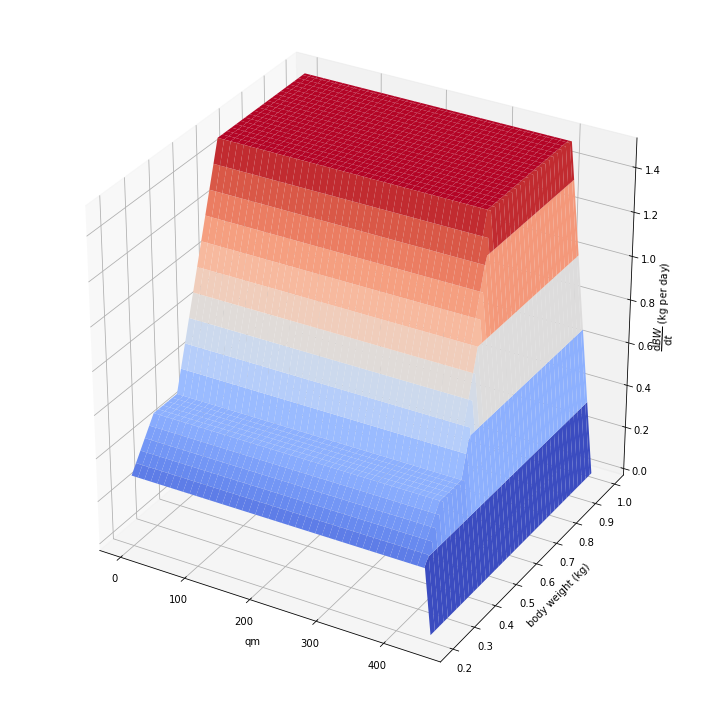

In [102]:
# create meshgrid for qm and body weigth
max_bw = 450
bw = np.arange(0, max_bw+1, 1)
qm = np.arange(0.2, 1, 0.01)
bws, qms = np.meshgrid(bw, qm)

# data for cows after Tolkamp and Ketelaars (1994)
comp_gain = [[0.2, 0.3],
             [0.3, 0.5],
             [0.4, 0.5],
             [0.5, 1.0],
             [0.6, 1.5],
             [0.7, 1.5],
             [0.8, 1.5],
             [1.0, 1.5]]

# create function to do linear interpolation for qm
xs = [i[0] for i in comp_gain]
ys = [i[1] for i in comp_gain]
get_comp_gain = interp1d(xs, ys)

# use function to get values for qm
comp_gains = get_comp_gain(qms)

# cap maximum growth to prevent exceeding maximum body weight
max_growth = (max_bw - bws) / 30

# change in body weight is minimum of compensatory gain and growth cap
dBW_dt = np.minimum(max_growth, comp_gains)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

bla = ax.plot_surface(bws, qms, dBW_dt, cmap=cm.coolwarm, antialiased=True, linewidth=0)

ax.set_xlabel('qm')
ax.set_ylabel('body weight (kg)')
ax.set_zlabel(r"$\dfrac{\mathrm{d}BW}{\mathrm{d}t}$ (kg per day)")

plt.tight_layout()
plt.show()

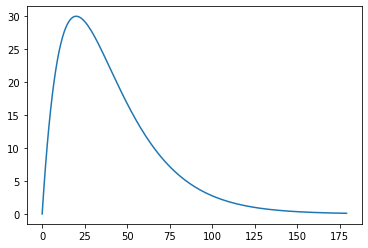

In [115]:
peak_milk_yield = 30
T = 2
n = np.arange(0, 18, 0.1)

k = 1 / T

a = 1 / (peak_milk_yield * k * np.exp(1))

potential_milk_yield = n / (a * np.exp(k*n))

plt.plot(potential_milk_yield)

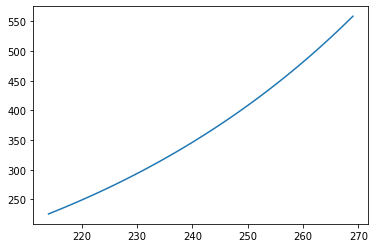

In [127]:
k_g = 0.2
days_in_gestation = np.arange(270-56, 270, 1)

ME_gestation = (0.044 * np.exp(0.0165 * days_in_gestation)) / k_g

ME_gestation_per_month = ME_gestation * 30

plt.plot(days_in_gestation, ME_gestation_per_month)